In [1]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import soundfile as sf
from IPython.display import clear_output
import torch
import torchvision
from torchvision import models

In [2]:
import os
import sys
sys.path.append("./../pyfiles/")
from util import plot_spectrogram, play_audio
from WaveGlow import call_waveglow, audio_generation
from dataset import Dataset_mel, transform_mel
from FID import FID

---

<font size="5">Overviews</font>
1. Introduction
1. Preparation
1. Comparison in models
1. Comparison in emotions
1. Comparison in FID
1. Save mel-spectrogram and audio

---

# Introduction
---
Since the notebook of the results is divided into 2, I'm going to combine 2 results in this notebook and compare them among all models. Please run the notebooks below to get the result first, or you can check the result in README as well.
- `03_GAN_audio_AM.ipynb`
- `05_GAN_mel_AM.ipynb`

---

# Preparation
---
First of all, let's define some variables and call data or WaveGlow for result.

---

In [3]:
device = "cuda"
emotions = ["neutral", "happy", "sad", "angry"] # the labels of classes
data_type = ["mel_wavenet", "mel_lstm", "mel_cnn", "audio_wavenet", "audio_lstm"] # name of models
root = "../data/results/GAN_100/"

In [4]:
all_data = {}
for dt in data_type:
    save_path = f"{root}{dt}/results_{dt}.pkl"
    with open(save_path, mode='rb') as f:
        data = pickle.load(f)
    all_data[dt] = data

In [5]:
model_path = "../data/parameters/waveglow_official.pth"
waveglow = call_waveglow(model_path, True, device)
fs = 22050

# Comparison in models
---
First of all, let's take a look at the differences among models.

- *emotion*: the target emotmion
- *display_audio*: whether include the audio when display the result or not
- *display_waveform*: whether include the waveform when display the result or not



---

sample number: 0


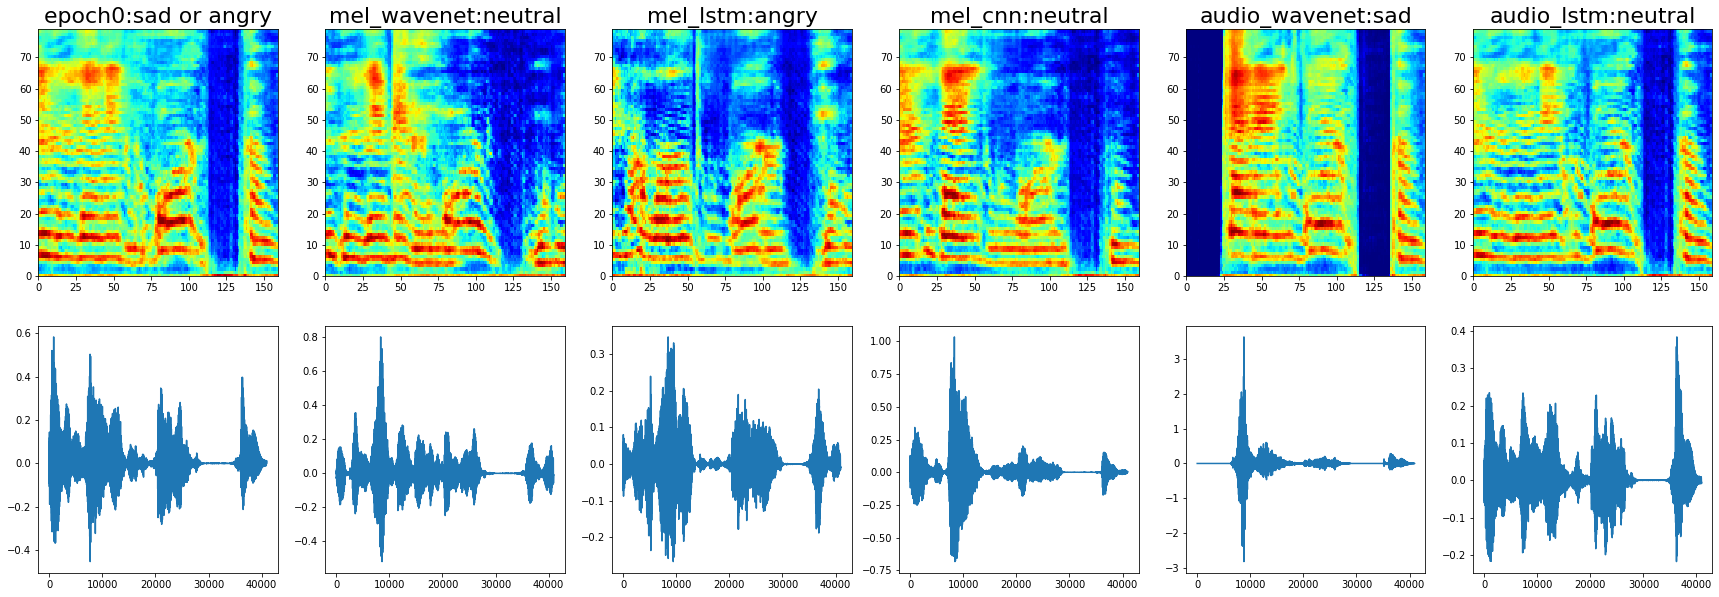

-------------------------------------------------------------------
sample number: 1


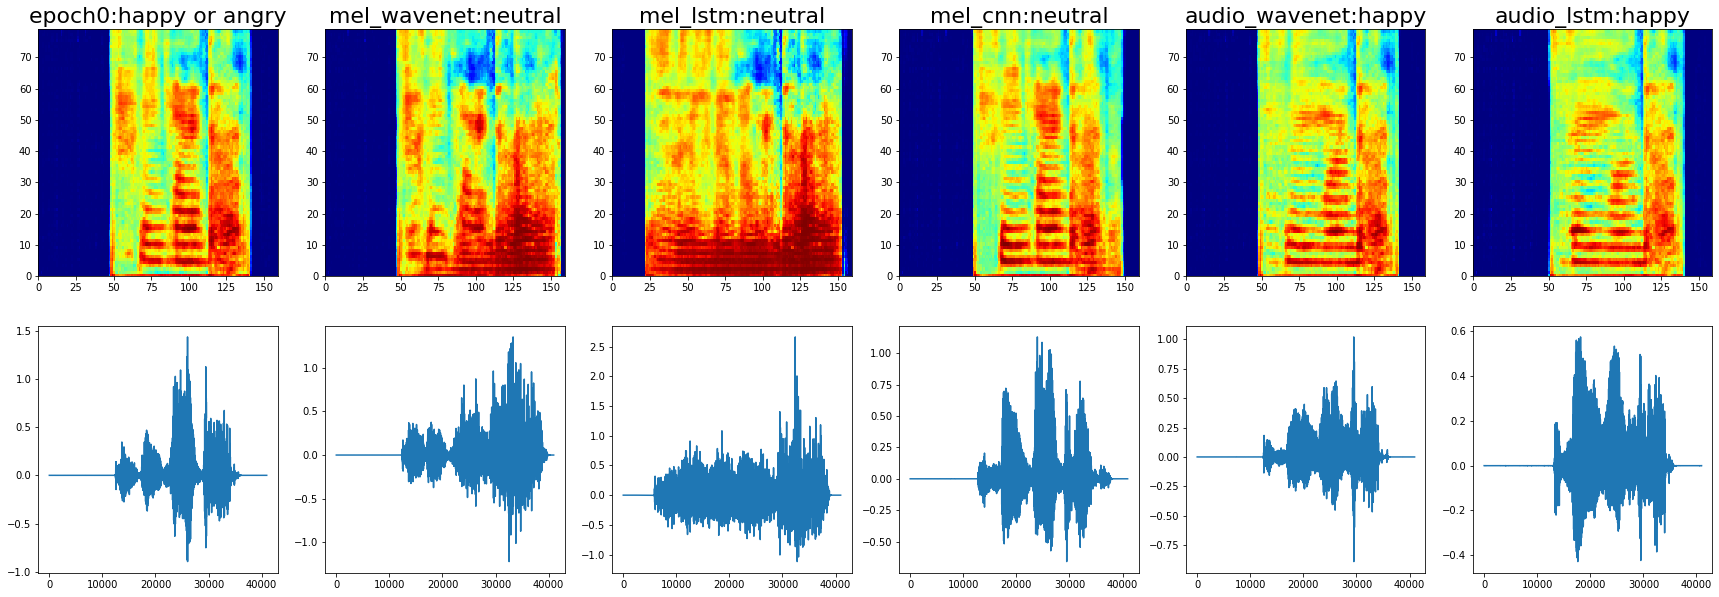

-------------------------------------------------------------------
sample number: 2


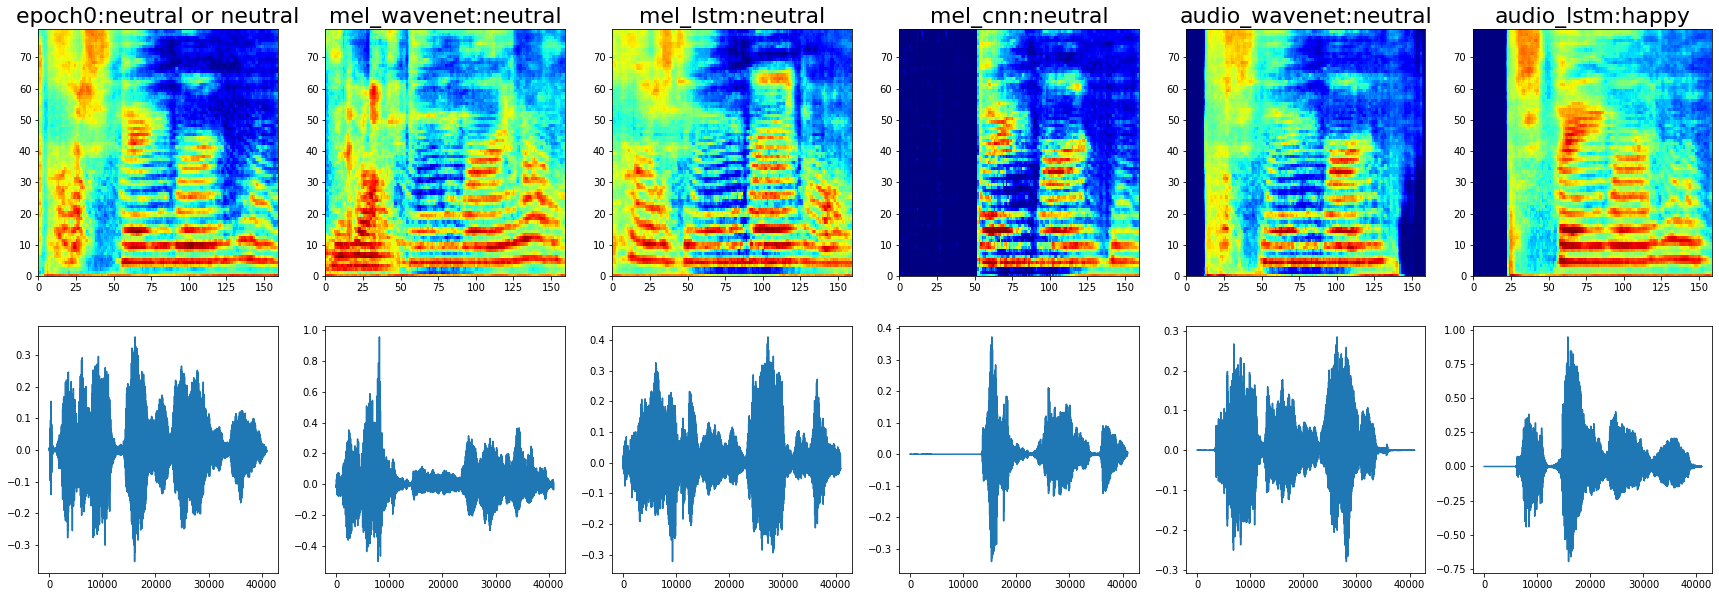

-------------------------------------------------------------------
sample number: 3


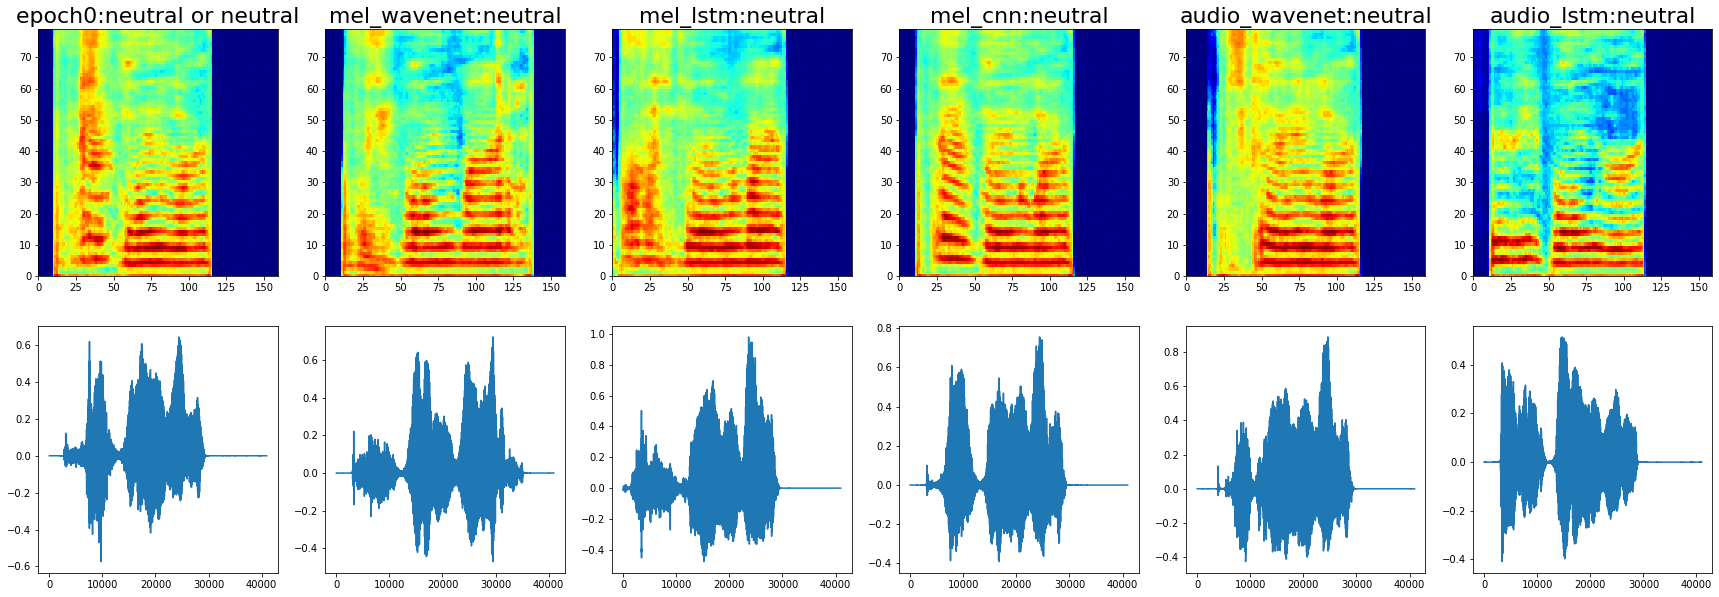

-------------------------------------------------------------------
sample number: 4


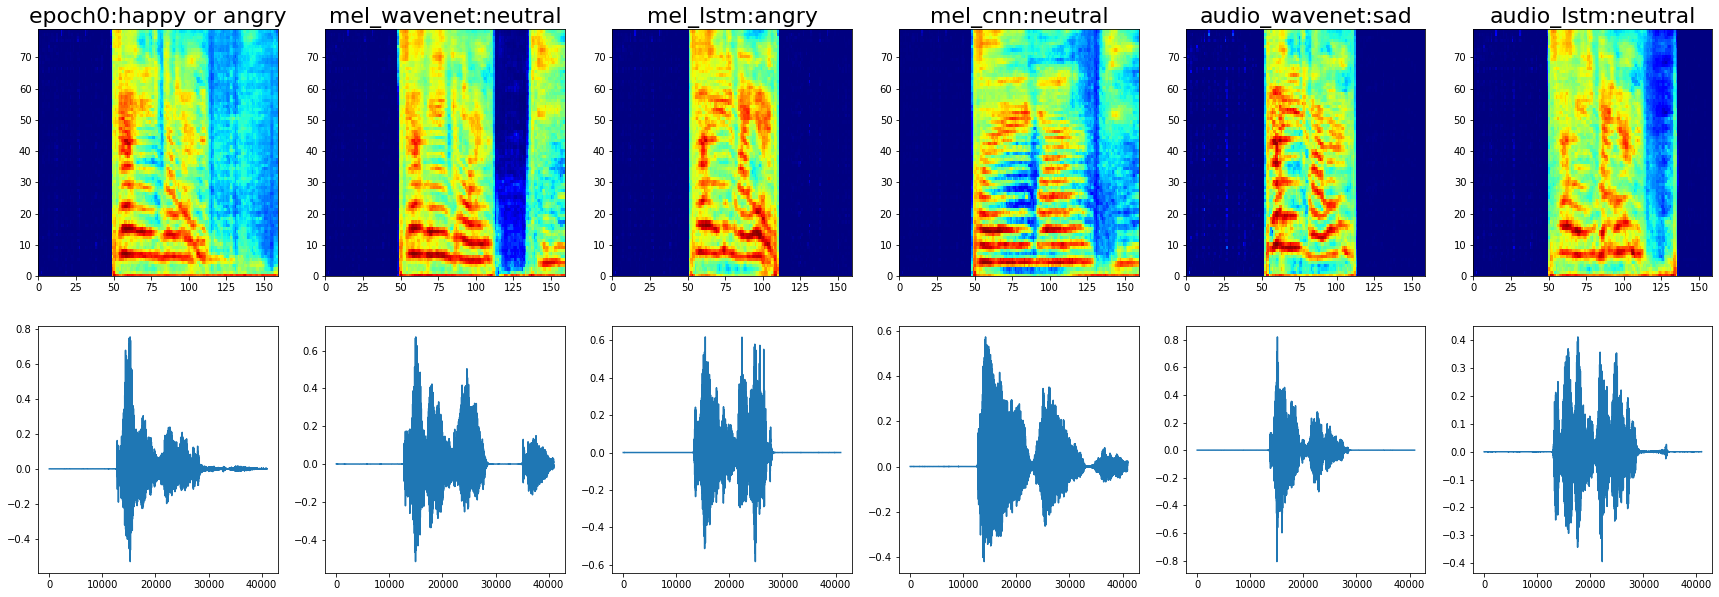

-------------------------------------------------------------------


In [6]:
# ----------- adjustable parameters ------------- #
emotion = "neutral"
display_num = 5
display_audio = True
display_waveform = True
# ----------------------------------------------- #

for i in range(display_num):
    print(f"sample number: {i}")
    fig = plt.figure(figsize=(30,5*(int(display_waveform)+1)))
    M = all_data["mel_wavenet"][emotion][i]["mel"][0][0][0]
    plot_spectrogram(M, fig, ((int(display_waveform)+1), 6, 1), title=f"epoch0:{emotions[all_data['mel_wavenet'][emotion][i]['prediction'][0]]} or {emotions[all_data['audio_wavenet'][emotion][i]['prediction'][0]]}", title_font=22)
    
    mel = torch.tensor(all_data["mel_wavenet"][emotion][i]["mel"][0][0]).to(device)
    audio, noise = audio_generation(mel, waveglow)
    if display_waveform:
        ax = fig.add_subplot(2, 6, 7)
        ax.plot(audio)
    if display_audio:
        play_audio(audio, fs)
    
    for j in range(len(data_type)):
        M = all_data[data_type[j]][emotion][i]["mel"][-1][0][0]
        plot_spectrogram(M, fig, (int(display_waveform)+1, 6, j+2), title=f"{data_type[j]}:{emotions[all_data[data_type[j]][emotion][i]['prediction'][-1]]}", title_font=22)
        
        mel = torch.tensor(all_data[data_type[j]][emotion][i]["mel"][-1][0]).to(device)
        audio, noise = audio_generation(mel, waveglow)
        if display_waveform:
            ax = fig.add_subplot(2, 6, j+8)
            ax.plot(audio)
        if display_audio:
            play_audio(audio, fs)
    plt.show()
    print("-------------------------------------------------------------------")

---
**neutral**:

It's obvious in no.0 and no.4, especially in no.4. It wasn't classified as 'neutral' in the first place. However, some models have greatly succeeded in optimization such as mel_cnn and audio_wavenet. The intonation became monotonous as if there is no emotion at all. In general, the neutral sound has horizontal lines in mel-spectrogram and it leads the mundane sound.

**sad**:

It seems more successful in no.0 and no.7. In no.0, mel-spectrogram based models have better results. The ups and downs of the intonation have reduced and the strong accent has transferred from the beginning to the middle as obviously shown in the waveform. As for no.7, all models had great results but a mel_cnn based model. it appears to have a strong intonation between the beginning and the middle. To sum up, intonation is weaker in the end.

**happy**:

We can find the unambiguous results in no.3. Most models have changed the mel-spectrogram obviously to reshape it to have a mountainous line in the middle of a speech. When we listen to the sounds, we can hear the drastic surge of the intonation in the middle.

**angry**:

As for the result in no.0 and no.6, The gap between the highs and lows of the intonation is intense and it's changed on and off quickly. As for the model performance, mel-spectrogram based models are superior to the audio-based models, especially in no.6.

---

## Comparison in emotions
---
Next, let's take a look at the differences among emotions.

- *model_type*: the structure of the classifier used for AM

---

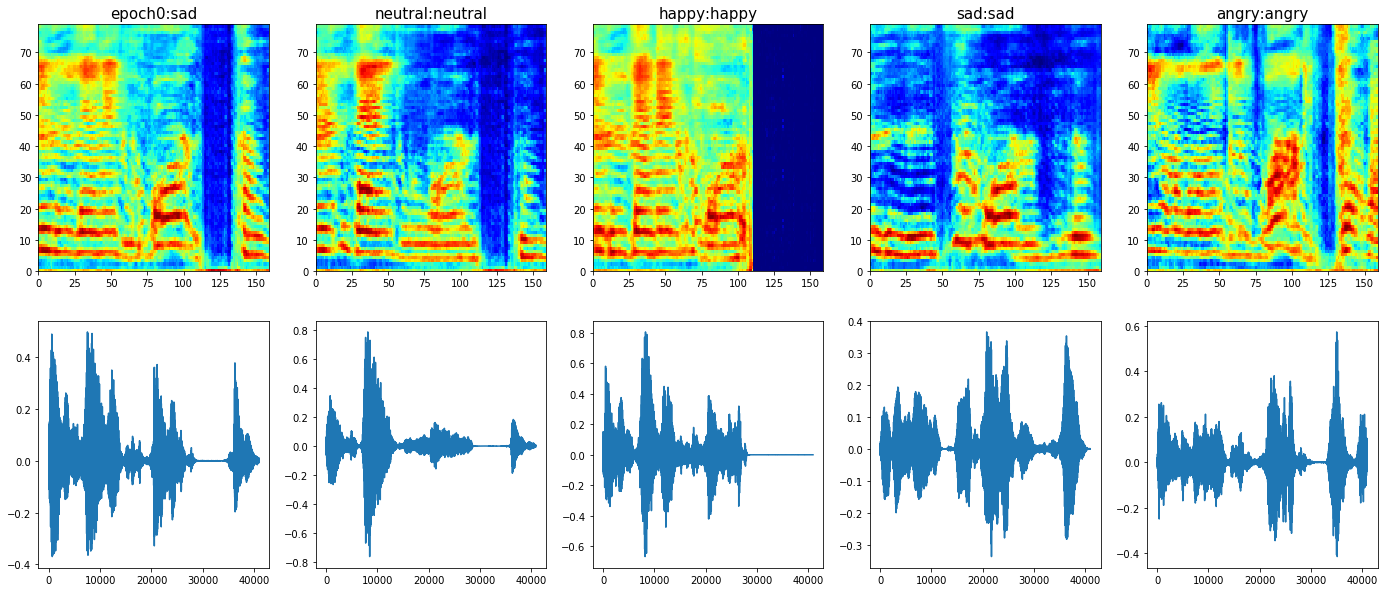

-------------------------------------------------------------------


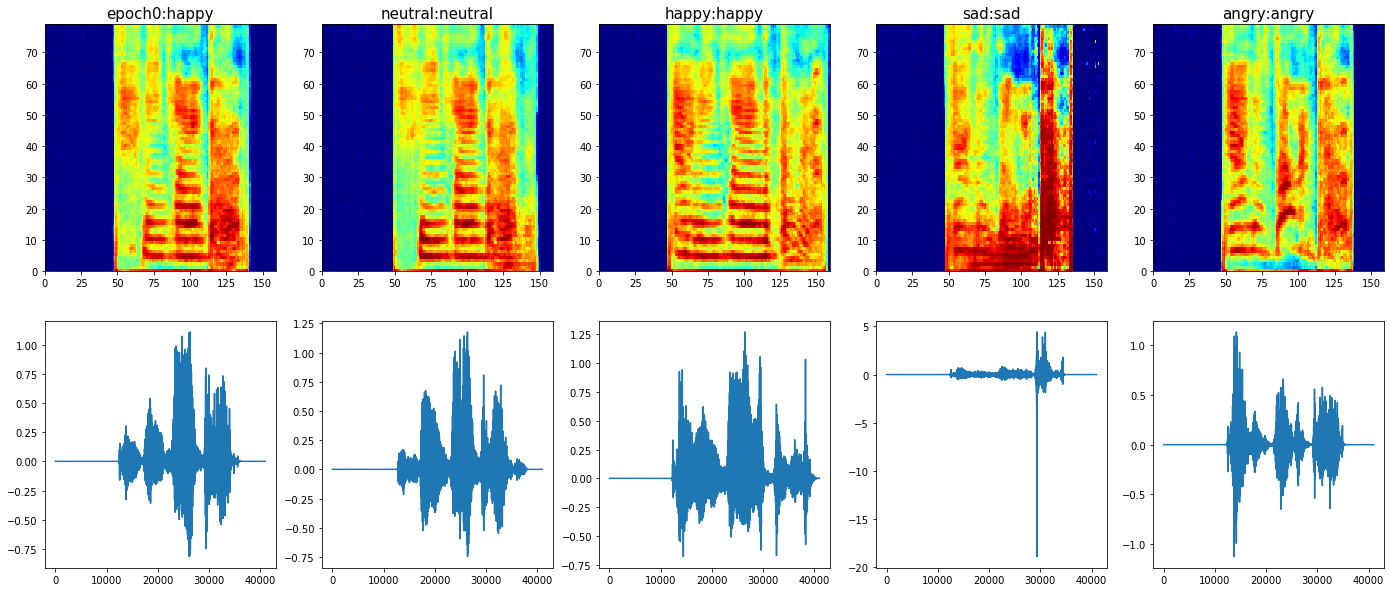

-------------------------------------------------------------------


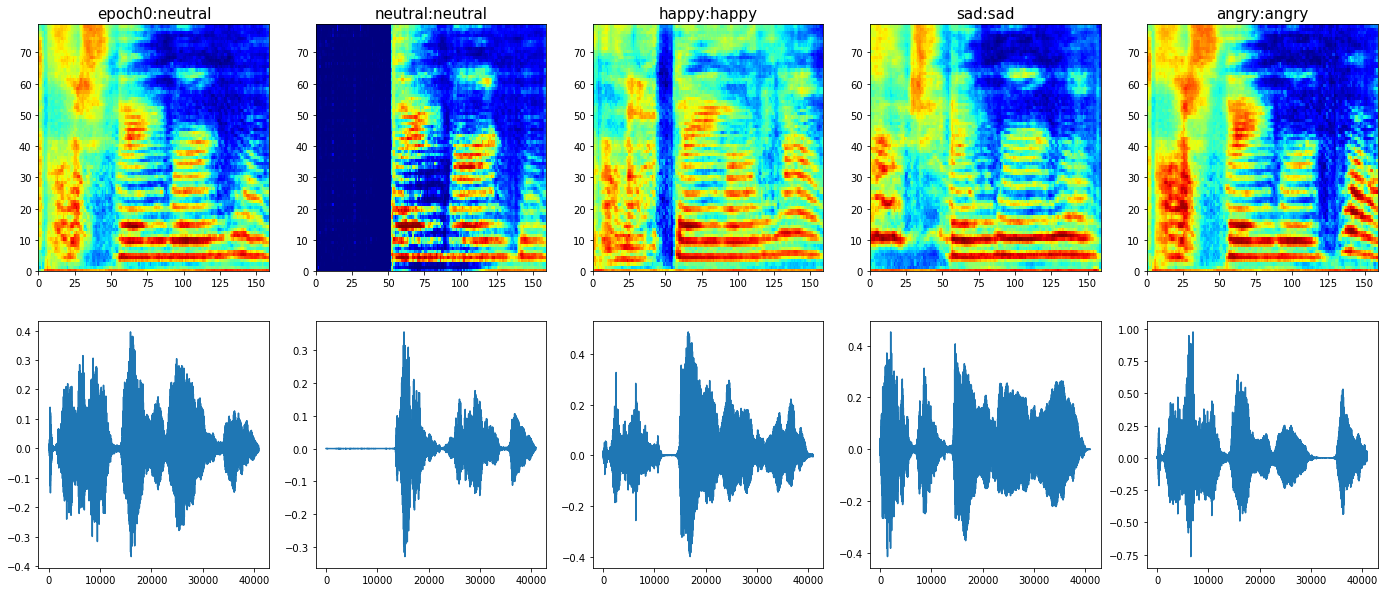

-------------------------------------------------------------------


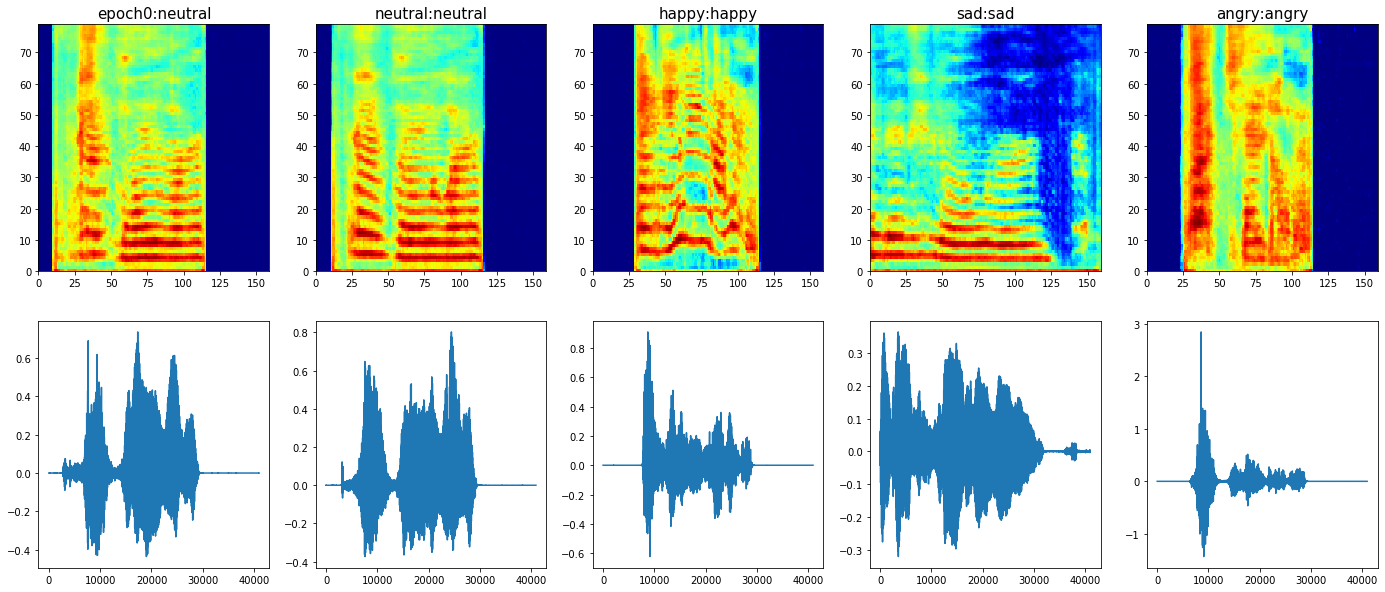

-------------------------------------------------------------------


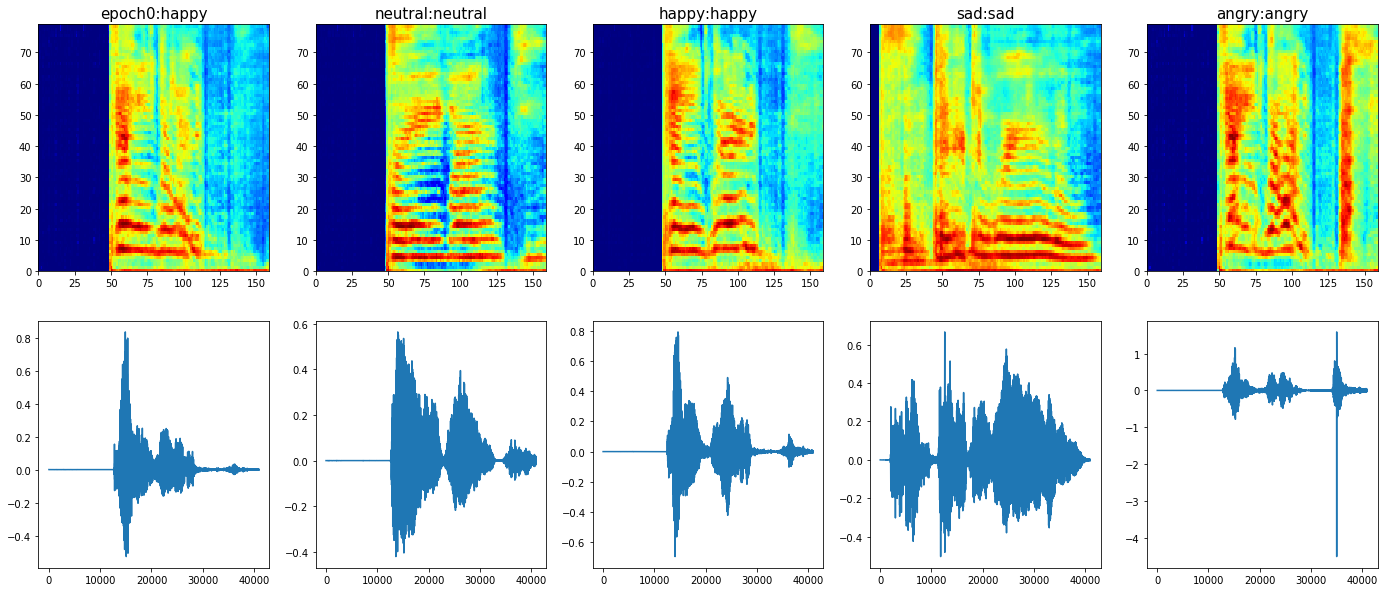

-------------------------------------------------------------------


In [7]:
# ----------- adjustable parameters ------------- #
model_type = "mel_cnn"
display_num = 5
display_audio = True
display_waveform = True
# ----------------------------------------------- #

for i in range(display_num):
    fig = plt.figure(figsize=(24,5*(int(display_waveform)+1)))
    M = all_data[model_type]["neutral"][i]["mel"][0][0][0]
    plot_spectrogram(M, fig, (int(display_waveform)+1, len(emotions)+1, 1), title=f"epoch0:{emotions[all_data['mel_wavenet'][emotion][i]['prediction'][0]]}")
    
    mel = torch.tensor(all_data["mel_wavenet"]["neutral"][i]["mel"][0][0]).to(device)
    audio, noise = audio_generation(mel, waveglow)
    if display_waveform:
        ax = fig.add_subplot(2, len(emotions)+1, len(emotions)+2)
        ax.plot(audio)
    if display_audio:
        play_audio(audio, fs)
    
    for j in range(len(emotions)):
        M = all_data[model_type][emotions[j]][i]["mel"][-1][0][0]
        plot_spectrogram(M, fig, (int(display_waveform)+1, len(emotions)+1, j+2), title=f"{emotions[j]}:{emotions[all_data[model_type][emotions[j]][i]['prediction'][-1]]}")
        
        mel = torch.tensor(all_data[model_type][emotions[j]][i]["mel"][-1][0]).to(device)
        audio, noise = audio_generation(mel, waveglow)
        
        if display_waveform:
            ax = fig.add_subplot(2, len(emotions)+1, j+7)
            ax.plot(audio)
        if display_audio:
            play_audio(audio, fs)
            
    plt.show()
    print("-------------------------------------------------------------------")

## Comparison in FID
---
Next, in order not to be subjective, we employ the well-known quantitative evaluation, or FID score. Originally, the inception model, used in this method, was pre-trained with ImageNet, which is far different from mel-spectrogram distribution. Therefore, we prepared the model pretrained with the datasets used in the GAN training, TESS and RAVDESS.

---
Parameters and Variables

---

In [8]:
# ----- adjustable parameters ----- #
emotions = ["neutral", "happy", "sad", "angry"] # the labels of classes
target_length = 2**15 # data length, about 1.5 seconds
root_TESS = "../../dataset/TESS/preprocessed/" # root path of the TESS dataset
root_RAVDESS = "../../dataset/RAVDESS/preprocessed/" # root path of the RAVDESS dataset
# --------------------------------- #

---
call each dataset

---

In [37]:
dataset = {}
dataset["tess"] = Dataset_mel(root_TESS, root_RAVDESS, transform_mel, emotions, target_length, mode="test", dataset="TESS")
dataset["rav"] = Dataset_mel(root_TESS, root_RAVDESS, transform_mel, emotions, target_length, mode="test", dataset="RAVDESS")
# dataset["tess"] = Dataset_mel(root_TESS, root_RAVDESS, transform_mel, emotions, target_length, mode="all", dataset="TESS")
# dataset["rav"] = Dataset_mel(root_TESS, root_RAVDESS, transform_mel, emotions, target_length, mode="all", dataset="RAVDESS")
dataset["train"] = {}
dataset["train"]["tess"] = Dataset_mel(root_TESS, root_RAVDESS, transform_mel, emotions, target_length, mode="train", dataset="TESS")
dataset["train"]["rav"] = Dataset_mel(root_TESS, root_RAVDESS, transform_mel, emotions, target_length, mode="train", dataset="RAVDESS")
data_num = len(all_data["audio_lstm"]["neutral"])

---
get test dataset for evaluation.

---

In [38]:
source = {}
source["tess"] = {}
source["rav"] = {}
for ds_type in ["tess", "rav"]:
    for emotion in emotions:
        source[ds_type][emotion] = []
for ds_type in ["tess", "rav"]:
    for n in range(len(dataset[ds_type])):
        data = dataset[ds_type][n]
        x = np.repeat(np.array(data[0]), 3, axis=0)
        source[ds_type][emotions[data[1]]].append(x)
for ds_type in ["tess", "rav"]:
    for emotion in emotions:
        source[ds_type][emotion] = torch.tensor(source[ds_type][emotion])

In [39]:
num = {}
for ds_type in ["tess", "rav"]:
    min_ = np.inf
    for emotion in emotions:
        n = source[ds_type][emotion].shape[0]
        if min_ > n:
            min_ = n
    num[ds_type] = min(min_, data_num)

---
get train dataset for original FID score.

---

In [40]:
train = {}
train["tess"] = {}
train["rav"] = {}
for i, emotion in enumerate(emotions):
    for ds_type in ["tess", "rav"]:
        train[ds_type][emotion] = []
        n = 0
        while len(train[ds_type][emotion])<num[ds_type]:
            data = dataset["train"][ds_type][n]
            if data[1] == i:
                x = np.repeat(np.array(data[0]), 3, axis=0)
                train[ds_type][emotion].append(x)
            n += 1
            
        train[ds_type][emotion] = torch.tensor(train[ds_type][emotion])

---
You can evaluate your result with the code below.

***pretraining***: the dataset used for the inception model's training: "ImageNet" or "sound"

---
Firstly, the inception model pre-trained with sound datasets.

---

In [42]:
# ----- adjustable parameters ----- #
pretraining = "sound"
# --------------------------------- #

FID_scores = []
clear_output(wait=True)
for emotion in emotions:
    print(emotion)
    for dataset_type in ["tess", "rav"]:
        print("    ", dataset_type)
        fid = FID(pretraining=pretraining, len_classes=len(emotions))
        x = source[dataset_type][emotion][:num[dataset_type]]
#         x = source[dataset_type][emotion][:data_num]
        fid.init_source_feature(x)
        
        scores = []
        y = train[dataset_type][emotion]
#         y = source[dataset_type][emotion][data_num:]
        score = fid.get_FID(y)
        scores.append(score)
        print("        ", "original", score)

        for dt in data_type:
            for i in range(len(all_data[dt][emotion])):
                M = all_data[dt][emotion][i]["mel"][-1]
                M = np.repeat(M, 3, axis=1)
                if i == 0:
                    y = M
                else:
                    y = np.concatenate([y, M], axis=0)
                    
            y = torch.tensor(y)
            score = fid.get_FID(y)

            scores.append(score)
            print("        ", dt, score)

        FID_scores.append(scores)
        
index = []
for emotion in emotions:
    for dataset_type in ["TESS", "RAVDESS"]:
        index.append((emotion, dataset_type))
index = pd.MultiIndex.from_tuples(index, names=['emotion','dataset'])
print("FID score")
pd.DataFrame(np.round(np.array(FID_scores), 3), index=index, columns=["original"]+data_type)

neutral
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 9.486010979956067
         mel_wavenet 577.6236725417535
         mel_lstm 389.72829934814916
         mel_cnn 362.8409690918769
         audio_wavenet 503.34015198516494
         audio_lstm 787.6527806143336
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 164.01561358210304
         mel_wavenet 247.8780014192689
         mel_lstm 413.2246595814289
         mel_cnn 601.2167033080545
         audio_wavenet 131.65218969526305
         audio_lstm 60.411721802265475
happy
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 7.327204904542313
         mel_wavenet 312.6045185892361
         mel_lstm 281.76150037280456
         mel_cnn 213.13927691636096
         audio_wavenet 278.06605409435224
         audio_lstm 337.65922329894636
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 196.01090366256602
         mel_wavenet 319.3320226790129
         mel_lstm 347.24663026403107
         mel_cnn 168.6444986887847
         audio_wavenet 300.9479129241852
         audio_lstm 385.5772023254757
sad
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 2.065491377786373
         mel_wavenet 97.21672677964942
         mel_lstm 53.46322611495288
         mel_cnn 40.31522676474481
         audio_wavenet 137.76282360082442
         audio_lstm 220.09460963910166
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 329.1884015351062
         mel_wavenet 146.19234292684195
         mel_lstm 138.40321109919924
         mel_cnn 121.69120577678189
         audio_wavenet 32.16053119382584
         audio_lstm 34.54590505247717
angry
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 8.034410660979008
         mel_wavenet 168.5918687404147
         mel_lstm 304.0035634664074
         mel_cnn 84.82756531572886
         audio_wavenet 444.3245173103029
         audio_lstm 466.1339940563832
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 231.61342191015558
         mel_wavenet 146.2699389577645
         mel_lstm 421.99683219839903
         mel_cnn 57.08845435497108
         audio_wavenet 557.0609801359874
         audio_lstm 635.4136150272245
FID score


original  mel_wavenet  mel_lstm  mel_cnn  audio_wavenet  \
emotion dataset                                                            
neutral TESS        9.486      577.624   389.728  362.841        503.340   
        RAVDESS   164.016      247.878   413.225  601.217        131.652   
happy   TESS        7.327      312.605   281.762  213.139        278.066   
        RAVDESS   196.011      319.332   347.247  168.644        300.948   
sad     TESS        2.065       97.217    53.463   40.315        137.763   
        RAVDESS   329.188      146.192   138.403  121.691         32.161   
angry   TESS        8.034      168.592   304.004   84.828        444.325   
        RAVDESS   231.613      146.270   421.997   57.088        557.061   

                 audio_lstm  
emotion dataset              
neutral TESS        787.653  
        RAVDESS      60.412  
happy   TESS        337.659  
        RAVDESS     385.577  
sad     TESS        220.095  
        RAVDESS      34.546  
angry   TESS        466.134  
        RAVDESS     635.414

---
Then, the inception model pre-trained with ImageNet.

---

In [43]:
# ----- adjustable parameters ----- #
pretraining = "ImageNet"
# --------------------------------- #

FID_scores = []
clear_output(wait=True)
for emotion in emotions:
    print(emotion)
    for dataset_type in ["tess", "rav"]:
        print("    ", dataset_type)
        fid = FID(pretraining=pretraining, len_classes=len(emotions))
        x = source[dataset_type][emotion][:num[dataset_type]]
        fid.init_source_feature(x)
        
        scores = []
        y = train[dataset_type][emotion]
        score = fid.get_FID(y)
        scores.append(score)
        print("        ", "original", score)

        for dt in data_type:
            for i in range(len(all_data[dt][emotion])):
                M = all_data[dt][emotion][i]["mel"][-1]
                M = np.repeat(M, 3, axis=1)
                if i == 0:
                    y = M
                else:
                    y = np.concatenate([y, M], axis=0)
                    
            y = torch.tensor(y)
            score = fid.get_FID(y)

            scores.append(score)
            print("        ", dt, score)

        FID_scores.append(scores)
        
index = []
for emotion in emotions:
    for dataset_type in ["TESS", "RAVDESS"]:
        index.append((emotion, dataset_type))
index = pd.MultiIndex.from_tuples(index, names=['emotion','dataset'])
print("FID score")
pd.DataFrame(np.round(np.array(FID_scores), 3), index=index, columns=["original"]+data_type)

neutral
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 78.63114206502411
         mel_wavenet 169.84247128043708
         mel_lstm 158.84604663185033
         mel_cnn 143.2827472863491
         audio_wavenet 151.4824537642958
         audio_lstm 164.045144926514
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 123.47332603241004
         mel_wavenet 158.8073240911549
         mel_lstm 156.3278492646098
         mel_cnn 145.7285595889707
         audio_wavenet 149.6740006463186
         audio_lstm 154.83074856569493
happy
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 118.77603455686744
         mel_wavenet 180.493615028427
         mel_lstm 173.90377643078932
         mel_cnn 167.68028728120944
         audio_wavenet 160.18241478779385
         audio_lstm 159.25532989768158
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 107.566034228257
         mel_wavenet 182.49915306655316
         mel_lstm 182.42555551370887
         mel_cnn 164.719465469709
         audio_wavenet 166.19240236846704
         audio_lstm 166.2482661518695
sad
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 98.01134181994732
         mel_wavenet 144.58072447682235
         mel_lstm 134.962440554492
         mel_cnn 140.2813370559472
         audio_wavenet 130.33060241563797
         audio_lstm 129.90490493543953
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 132.70653315940828
         mel_wavenet 164.21261773261756
         mel_lstm 180.63509477403952
         mel_cnn 158.35341968912144
         audio_wavenet 173.49411710493285
         audio_lstm 160.990038027279
angry
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 112.5132352207935
         mel_wavenet 171.8984006033864
         mel_lstm 175.07111316078482
         mel_cnn 164.05345690702416
         audio_wavenet 165.5986399564042
         audio_lstm 161.14690886883346
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 116.23916304774434
         mel_wavenet 181.11083891428942
         mel_lstm 182.70652773798966
         mel_cnn 153.96929933091525
         audio_wavenet 168.84847797238638
         audio_lstm 163.930351550837
FID score


original  mel_wavenet  mel_lstm  mel_cnn  audio_wavenet  \
emotion dataset                                                            
neutral TESS       78.631      169.842   158.846  143.283        151.482   
        RAVDESS   123.473      158.807   156.328  145.729        149.674   
happy   TESS      118.776      180.494   173.904  167.680        160.182   
        RAVDESS   107.566      182.499   182.426  164.719        166.192   
sad     TESS       98.011      144.581   134.962  140.281        130.331   
        RAVDESS   132.707      164.213   180.635  158.353        173.494   
angry   TESS      112.513      171.898   175.071  164.053        165.599   
        RAVDESS   116.239      181.111   182.707  153.969        168.848   

                 audio_lstm  
emotion dataset              
neutral TESS        164.045  
        RAVDESS     154.831  
happy   TESS        159.255  
        RAVDESS     166.248  
sad     TESS        129.905  
        RAVDESS     160.990  
angry   TESS        161.147  
        RAVDESS     163.930

# Save Audio
---
You can save the audio with the code below.

---

In [44]:
# ----- adjustable parameters ----- #
root = "./../data/results/"
root_audio = root + "audio/"
root_model = root_audio + "GAN_100_sample/"
save = True
# --------------------------------- #

os.makedirs(root, exist_ok=True)
os.makedirs(root_audio, exist_ok=True)
os.makedirs(root_model, exist_ok=True)
for model_type in data_type:
    print(model_type)
    model_path = root_model + model_type + "/"
    os.makedirs(model_path, exist_ok=True)
    for emotion in emotions:
        print("    ", emotion)
        emotion_path = model_path + emotion + "/"
        os.makedirs(emotion_path, exist_ok=True)
        for i in range(len(all_data[model_type][emotion])):
            mel = torch.tensor(all_data[model_type][emotion][i]["mel"][-1][0]).to(device)
            audio, noise = audio_generation(mel, waveglow)
            save_path = emotion_path + f"{model_type}_{emotion}_sample_{i}.wav"
            if save:
                sf.write(save_path, audio, fs, subtype='PCM_24')
                
model_path = root_model + "original/"
print("original")
os.makedirs(model_path, exist_ok=True)
for emotion in emotions:
    print("    ", emotion)
    emotion_path = model_path + emotion + "/"
    os.makedirs(emotion_path, exist_ok=True)
    for i in range(len(all_data[model_type][emotion])):
        mel = torch.tensor(all_data[model_type][emotion][i]["mel"][0][0]).to(device)
        audio, noise = audio_generation(mel, waveglow)
        save_path = emotion_path + f"original_{emotion}_sample_{i}.wav"
        if save:
            sf.write(save_path, audio, fs, subtype='PCM_24')

mel_wavenet
     neutral
     happy
     sad
     angry
mel_lstm
     neutral
     happy
     sad
     angry
mel_cnn
     neutral
     happy
     sad
     angry
audio_wavenet
     neutral
     happy
     sad
     angry
audio_lstm
     neutral
     happy
     sad
     angry
original
     neutral
     happy
     sad
     angry
